# $\color{orange}{\textbf{Previsão das séries temporais}}$

$\color{orange}{\textbf{Realizaremos previsões para 5 variáveis; Aeronaves, helicópteros, tanques de guerra, automóveis}}$

$\color{orange}{\textbf{e mortes russas.}}$

In [372]:
"""
Definindo vários DFs apenas com a data e uma variável. 
"""
aeronaves = Dados[["date", "aircraft"]]              
helicopteros = Dados[["date", "helicopter"]]              
tanques = Dados[["date", "tank"]]                    
automoveis_militares = Dados[["date", "military auto"]]             
pessoas = Dados[["date", "personnel"]]               

In [373]:
"""
Transformando a data em índices
"""
aeronaves.set_index("date", drop = True, inplace = True)           
helicopteros.set_index("date", drop = True, inplace = True)             
tanques.set_index("date", drop = True, inplace = True)                   
automoveis_militares.set_index("date", drop = True, inplace = True)          
pessoas.set_index("date", drop = True, inplace = True)

In [374]:
"""
Criando um setup com a variável
"""
setup(aeronaves, fh = 5, fold = 6, seasonal_period="D", n_jobs = -1, use_gpu = True)

,Description,Value
0,session_id,8048
1,Target,aircraft
2,Original Data,"(53, 1)"
3,Missing Values,False
4,Approach,Univariate
5,Exogenous Variables,Not Present
6,Transformed Train Target,"(48,)"
7,Transformed Test Target,"(5,)"
8,Transformed Train Exogenous,"(48, 0)"
9,Transformed Test Exogenous,"(5, 0)"


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='aircraft',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fill_val...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify

In [375]:
"""
Comparando modelos de ajuste
"""
best_model = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,3.5555,4.1617,0.0285,0.0279,0.9819,0.7599,-4.6941,0.3017
exp_smooth,Exponential Smoothing,3.7702,4.3098,0.0300,0.0294,1.0433,0.7898,-5.3033,0.0267
theta,Theta Forecaster,3.6827,4.1332,0.0311,0.0317,0.9996,0.7307,-0.4284,0.0383
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,5.2144,5.8295,0.0396,0.0385,1.4818,1.0917,-7.1818,0.0317
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,5.3262,5.9261,0.0407,0.0395,1.5103,1.1075,-7.0656,0.0533
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,5.0988,5.7722,0.0422,0.0426,1.4082,1.0434,-6.7756,0.0350
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,6.2279,6.9564,0.0463,0.0448,1.7699,1.3083,-14.9020,0.5000
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,5.5894,6.2171,0.0455,0.0454,1.5536,1.1339,-9.9841,0.0300
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,5.5894,6.2171,0.0455,0.0454,1.5536,1.1339,-9.9841,0.0250
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,5.5923,6.2198,0.0455,0.0454,1.5545,1.1344,-9.9933,0.0300


INFO:logs:master_model_container: 30
INFO:logs:display_container: 2
INFO:logs:AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=8048, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=1, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...)
INFO:logs:compare_models() successfully completed......................................


In [376]:
"""
Definindo o modelo que ganhou na comparação
"""
auto_arima = create_model("auto_arima")

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-03-14,1.1412,1.5310,0.0129,0.0128,0.2896,0.2381,0.9179
1,2022-03-19,6.3909,6.7518,0.0635,0.0614,1.6541,1.1303,-1.5103
2,2022-03-24,1.7111,1.9902,0.0145,0.0146,0.4714,0.3560,0.7829
3,2022-03-29,1.9438,2.5690,0.0137,0.0138,0.5316,0.4758,0.7422
4,2022-04-03,4.5459,6.1541,0.0303,0.0295,1.2647,1.1670,-25.3005
5,2022-04-08,5.6000,5.9740,0.0361,0.0353,1.6800,1.1925,-3.7969
Mean,nan,3.5555,4.1617,0.0285,0.0279,0.9819,0.7599,-4.6941
SD,nan,2.0424,2.1655,0.0180,0.0172,0.5718,0.4095,9.3685


INFO:logs:master_model_container: 31
INFO:logs:display_container: 3
INFO:logs:AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=8048, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=1, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...)
INFO:logs:create_model() successfully completed......................................


In [377]:
"""
Finalização do modelo
"""
final_aeronaves = finalize_model(auto_arima)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x0000022C1D8621F0>, estimator=AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=8048, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=1, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
       

In [378]:
"""
Realizando 5 dias de previsão
"""
pred_aeronaves = predict_model(final_aeronaves, fh = 5)
pred_aeronaves = pd.DataFrame(pred_aeronaves, columns = ["date", "aircraft"])
pred_aeronaves["date"] = pred_aeronaves.index.to_timestamp()
pred_aeronaves = pred_aeronaves.loc[pred_aeronaves["aircraft"] > 0]
pred_aeronaves

,date,aircraft
2022-04-19,2022-04-19,170.0192
2022-04-20,2022-04-20,173.0385
2022-04-21,2022-04-21,176.0577
2022-04-22,2022-04-22,179.0769
2022-04-23,2022-04-23,182.0962


In [379]:
setup(helicopteros, fh = 5, fold = 6, seasonal_period = "D", n_jobs = -1, use_gpu = True)

,Description,Value
0,session_id,5749
1,Target,helicopter
2,Original Data,"(53, 1)"
3,Missing Values,False
4,Approach,Univariate
5,Exogenous Variables,Not Present
6,Transformed Train Target,"(48,)"
7,Transformed Test Target,"(5,)"
8,Transformed Train Exogenous,"(48, 0)"
9,Transformed Test Exogenous,"(5, 0)"


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='helicopter', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fill_v...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify

In [380]:
best_model = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
theta,Theta Forecaster,4.9832,5.4019,0.0398,0.0398,1.2342,0.7985,-36.8803,0.0417
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,6.0471,6.9400,0.0477,0.0462,1.4648,1.0187,-56.4401,0.0367
exp_smooth,Exponential Smoothing,6.6209,7.6669,0.0517,0.0499,1.6395,1.1431,-100.4300,0.0350
naive,Naive Forecaster,5.8333,6.3699,0.0491,0.0523,1.3197,0.8833,-4.9804,0.0150
auto_arima,Auto ARIMA,8.0431,9.1848,0.0630,0.0605,1.9621,1.3578,-92.9792,0.5333
arima,ARIMA,7.2475,7.9037,0.0606,0.0650,1.6538,1.1028,-10.2713,0.0617
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,11.5831,12.7444,0.0891,0.0840,3.0040,1.9599,-244.4302,0.0350
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,11.5831,12.7444,0.0891,0.0840,3.0040,1.9599,-244.4302,0.0417
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,11.5831,12.7444,0.0891,0.0840,3.0040,1.9599,-244.4302,0.0317
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,11.5906,12.7517,0.0891,0.0841,3.0060,1.9611,-244.7405,0.0350


INFO:logs:master_model_container: 30
INFO:logs:display_container: 2
INFO:logs:ThetaForecaster(deseasonalize=True, initial_level=None, sp=1)
INFO:logs:compare_models() successfully completed......................................


In [381]:
theta = create_model("theta")

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-03-14,7.6722,8.6105,0.0693,0.0724,1.5714,1.0920,-0.5896
1,2022-03-19,2.6858,3.1002,0.0219,0.0216,0.5471,0.4071,-0.8484
2,2022-03-24,5.9721,6.3364,0.0469,0.0457,1.3782,0.9135,-24.0940
3,2022-03-29,4.7104,5.0051,0.0356,0.0349,1.2355,0.7829,-10.5975
4,2022-04-03,6.3601,6.6826,0.0472,0.0460,1.8529,1.1184,-185.0736
5,2022-04-08,2.4985,2.6765,0.0181,0.0179,0.8198,0.4771,-0.0789
Mean,nan,4.9832,5.4019,0.0398,0.0398,1.2342,0.7985,-36.8803
SD,nan,1.8987,2.0693,0.0172,0.0181,0.4399,0.2764,66.8147


INFO:logs:master_model_container: 31
INFO:logs:display_container: 3
INFO:logs:ThetaForecaster(deseasonalize=True, initial_level=None, sp=1)
INFO:logs:create_model() successfully completed......................................


In [382]:
final_helicopter = finalize_model(theta)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x0000022C1E259C40>, estimator=ThetaForecaster(deseasonalize=True, initial_level=None, sp=1), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing ThetaForecaster(deseasonalize=True, initial_level=None, sp=1)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x0000022C1E259C40>, estimator=ThetaForecaster(deseasonalize=True, initial_level=None, sp=1), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:l

In [383]:
pred_helicopter = predict_model(final_helicopter, fh = 5)
pred_helicopter = pd.DataFrame(pred_helicopter, columns = ["date", "helicopter"])
pred_helicopter["date"] = pred_helicopter.index.to_timestamp()
pred_helicopter = pred_helicopter.loc[pred_helicopter["helicopter"] > 0]
pred_helicopter

,date,helicopter
2022-04-19,2022-04-19,149.4547
2022-04-20,2022-04-20,150.6820
2022-04-21,2022-04-21,151.9094
2022-04-22,2022-04-22,153.1367
2022-04-23,2022-04-23,154.3641


In [384]:
setup(tanques, fh = 5, fold = 6, seasonal_period = "D", n_jobs = -1, use_gpu = True)

,Description,Value
0,session_id,636
1,Target,tank
2,Original Data,"(53, 1)"
3,Missing Values,False
4,Approach,Univariate
5,Exogenous Variables,Not Present
6,Transformed Train Target,"(48,)"
7,Transformed Test Target,"(5,)"
8,Transformed Train Exogenous,"(48, 0)"
9,Transformed Test Exogenous,"(5, 0)"


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='tank',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fill_value_n...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify

In [385]:
best_model = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,8.6948,10.1595,0.0147,0.0147,0.5374,0.4818,0.3552,0.7583
exp_smooth,Exponential Smoothing,12.2314,13.5224,0.0205,0.0205,0.7588,0.6459,0.0462,0.0317
theta,Theta Forecaster,11.1682,11.8862,0.0203,0.0205,0.6687,0.5461,0.2453,0.0383
par_cds_dt,Passive Aggressive w/ Cond. Deseasonalize & Detrending,12.9187,14.3130,0.0216,0.0213,0.7945,0.6796,-0.8700,0.0317
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,16.9338,18.1311,0.0267,0.0263,1.0778,0.8909,-1.2465,0.0467
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,17.2341,18.9175,0.0282,0.0277,1.0757,0.9097,-1.3095,0.0500
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,18.9397,20.3649,0.0295,0.0290,1.2104,1.0056,-1.6894,0.0317
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,20.7110,21.7988,0.0326,0.0320,1.3178,1.0719,-1.9010,0.5083
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,21.3502,22.7865,0.0337,0.0330,1.3548,1.1174,-2.2888,0.2833
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,21.4217,23.3794,0.0361,0.0353,1.3212,1.1138,-2.4118,0.0350


INFO:logs:master_model_container: 30
INFO:logs:display_container: 2
INFO:logs:AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=636, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=1, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...)
INFO:logs:compare_models() successfully completed......................................


In [386]:
auto_arima = create_model("auto_arima")

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-03-14,4.8000,6.7231,0.0109,0.0110,0.2641,0.2758,0.8964
1,2022-03-19,10.5768,12.8445,0.0207,0.0204,0.6028,0.5619,0.5060
2,2022-03-24,11.2000,13.2212,0.0195,0.0198,0.6720,0.6161,-0.2227
3,2022-03-29,6.2000,6.6783,0.0099,0.0098,0.3838,0.3219,0.7552
4,2022-04-03,5.6000,6.6633,0.0083,0.0083,0.3674,0.3396,0.8793
5,2022-04-08,13.7922,14.8268,0.0189,0.0187,0.9343,0.7753,-0.6827
Mean,nan,8.6948,10.1595,0.0147,0.0147,0.5374,0.4818,0.3552
SD,nan,3.3360,3.5241,0.0051,0.0051,0.2263,0.1821,0.6002


INFO:logs:master_model_container: 31
INFO:logs:display_container: 3
INFO:logs:AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=636, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=1, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...)
INFO:logs:create_model() successfully completed......................................


In [387]:
final_tanques = finalize_model(auto_arima)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x0000022C1B8C6250>, estimator=AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
          n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
          random_state=636, scoring='mse', scoring_args=None, seasonal=True,
          seasonal_test='ocsb', seasonal_test_args=None, sp=1, start_P=1,
          start_Q=1, start_p=2, start_params=None, ...), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
          information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
          max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
        

In [388]:
pred_tanques = predict_model(final_tanques, fh = 5)
pred_tanques = pd.DataFrame(pred_tanques, columns = ["date", "tank"])
pred_tanques["date"] = pred_tanques.index.to_timestamp()
pred_tanques = pred_tanques.loc[pred_tanques["tank"] > 0]
pred_tanques

,date,tank
2022-04-19,2022-04-19,793.6136
2022-04-20,2022-04-20,800.6231
2022-04-21,2022-04-21,814.3762
2022-04-22,2022-04-22,822.3043
2022-04-23,2022-04-23,829.0610


In [389]:
setup(automoveis_militares, fh= 5, fold = 6, seasonal_period = "D", n_jobs = -1, use_gpu=True)

,Description,Value
0,session_id,8838
1,Target,military auto
2,Original Data,"(53, 1)"
3,Missing Values,False
4,Approach,Univariate
5,Exogenous Variables,Not Present
6,Transformed Train Target,"(48,)"
7,Transformed Test Target,"(5,)"
8,Transformed Train Exogenous,"(48, 0)"
9,Transformed Test Exogenous,"(5, 0)"


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='military auto',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fill...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrou

In [390]:
best_model = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,41.9949,46.5834,0.0409,0.0429,1.3341,0.9685,-0.8882,0.0700
theta,Theta Forecaster,45.4026,49.2095,0.0455,0.0490,1.4429,1.0226,-0.4025,0.0750
auto_arima,Auto ARIMA,51.6859,57.2202,0.0489,0.0504,1.6221,1.1743,-2.3646,0.7983
exp_smooth,Exponential Smoothing,52.2150,57.5567,0.0492,0.0505,1.6377,1.1804,-2.5492,0.0683
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,63.1644,68.5727,0.0556,0.0558,2.0062,1.4287,-6.3886,0.0617
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,63.1644,68.5727,0.0556,0.0558,2.0062,1.4287,-6.3886,0.1117
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,63.1860,68.5934,0.0556,0.0558,2.0069,1.4291,-6.3945,0.0633
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,63.1890,68.5962,0.0556,0.0558,2.0070,1.4292,-6.3953,0.0667
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,63.1649,68.5731,0.0556,0.0558,2.0062,1.4287,-6.3888,0.0733
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,63.1644,68.5727,0.0556,0.0558,2.0062,1.4287,-6.3886,0.0717


INFO:logs:master_model_container: 30
INFO:logs:display_container: 2
INFO:logs:BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=HuberRegressor(alpha=0.0001, epsilon=1.35,
                                             fit_intercept=True, max_iter=100,
                                             tol=1e-05, warm_start=False),
                    sp=1, window_length=1)
INFO:logs:compare_models() successfully completed......................................


In [391]:
huber_cds_dt = create_model("huber_cds_dt")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-03-14,121.2844,134.3760,0.1402,0.1533,3.9881,2.8818,-0.9373
1,2022-03-19,7.8997,10.0124,0.0081,0.0081,0.2135,0.1738,0.8899
2,2022-03-24,26.1060,29.2840,0.0231,0.0235,0.7555,0.5511,-0.0138
3,2022-03-29,44.3485,47.5320,0.0362,0.0354,1.3165,0.9383,-3.1318
4,2022-04-03,10.5173,14.0999,0.0079,0.0079,0.3387,0.2973,0.8038
5,2022-04-08,41.8133,44.1961,0.0299,0.0294,1.3927,0.9690,-2.9400
Mean,nan,41.9949,46.5834,0.0409,0.0429,1.3341,0.9685,-0.8882
SD,nan,38.0749,41.6454,0.0456,0.0504,1.2668,0.9053,1.6348


INFO:logs:master_model_container: 31
INFO:logs:display_container: 3
INFO:logs:BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=HuberRegressor(alpha=0.0001, epsilon=1.35,
                                             fit_intercept=True, max_iter=100,
                                             tol=1e-05, warm_start=False),
                    sp=1, window_length=1)
INFO:logs:create_model() successfully completed......................................


In [392]:
final_automoveis = finalize_model("huber_cds_dt")

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x0000022C1CC745B0>, estimator=huber_cds_dt, fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing huber_cds_dt
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x0000022C1CC745B0>, estimator=huber_cds_dt, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Huber w/ Cond. Deseasonalize & Detrending Imported successfully
INFO:l

In [393]:
pred_automoveis = predict_model(final_automoveis, fh = 5)
pred_automoveis = pd.DataFrame(pred_automoveis, columns = ["date", "military auto"])
pred_automoveis["date"] = pred_automoveis.index.to_timestamp()
pred_automoveis = pred_automoveis.loc[pred_automoveis["military auto"] > 0]
pred_automoveis

,date,military auto
2022-04-19,2022-04-19,1505.2650
2022-04-20,2022-04-20,1523.4064
2022-04-21,2022-04-21,1541.4223
2022-04-22,2022-04-22,1559.3112
2022-04-23,2022-04-23,1577.0712


In [394]:
setup(pessoas, fh = 5, fold = 6, seasonal_period="D", n_jobs=-1, use_gpu=True)

,Description,Value
0,session_id,2506
1,Target,personnel
2,Original Data,"(53, 1)"
3,Missing Values,False
4,Approach,Univariate
5,Exogenous Variables,Not Present
6,Transformed Train Target,"(48,)"
7,Transformed Test Target,"(5,)"
8,Transformed Train Exogenous,"(48, 0)"
9,Transformed Test Exogenous,"(5, 0)"


INFO:logs:self.master_model_container: 0
INFO:logs:self.display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      float_dtype='float64', id_columns=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='personnel',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical='not_available',
                                fill_va...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify

In [395]:
best_model = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
theta,Theta Forecaster,281.2918,288.1522,0.0180,0.0182,0.5817,0.3396,-0.7641,0.0317
auto_arima,Auto ARIMA,475.3325,535.5290,0.0292,0.0288,0.9832,0.6371,-3.7860,1.7983
exp_smooth,Exponential Smoothing,465.8688,484.6067,0.0312,0.0330,0.9147,0.5409,-6.4938,0.0783
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,672.9002,751.1956,0.0406,0.0398,1.4362,0.9187,-6.1419,0.0783
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,920.5699,998.9908,0.0559,0.0539,1.9585,1.2168,-10.0068,0.1100
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,980.0581,1037.6305,0.0610,0.0572,2.0048,1.2261,-15.2550,0.0750
naive,Naive Forecaster,880.0000,940.6093,0.0554,0.0581,1.8151,1.1106,-10.5822,0.0283
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,999.6432,1110.1366,0.0618,0.0590,2.0724,1.3190,-12.1267,0.5917
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1042.2321,1180.3390,0.0626,0.0599,2.2312,1.4632,-15.2021,0.4867
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1078.3465,1224.9404,0.0666,0.0623,2.2159,1.4547,-17.4016,0.0767


INFO:logs:master_model_container: 30
INFO:logs:display_container: 2
INFO:logs:ThetaForecaster(deseasonalize=True, initial_level=None, sp=1)
INFO:logs:compare_models() successfully completed......................................


In [396]:
theta = create_model("theta")

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-03-14,813.7648,820.4572,0.0584,0.0602,1.5037,0.8504,-5.8970
1,2022-03-19,122.0836,132.0982,0.0081,0.0080,0.2315,0.1449,0.8893
2,2022-03-24,91.6750,95.6511,0.0055,0.0055,0.1904,0.1150,0.9422
3,2022-03-29,364.6439,373.5687,0.0206,0.0204,0.8103,0.4835,-1.5653
4,2022-04-03,74.7804,84.9799,0.0040,0.0040,0.1820,0.1177,0.8912
5,2022-04-08,220.8033,222.1579,0.0113,0.0113,0.5725,0.3258,0.1549
Mean,nan,281.2918,288.1522,0.0180,0.0182,0.5817,0.3396,-0.7641
SD,nan,257.5793,257.4517,0.0189,0.0195,0.4722,0.2644,2.4569


INFO:logs:master_model_container: 31
INFO:logs:display_container: 3
INFO:logs:ThetaForecaster(deseasonalize=True, initial_level=None, sp=1)
INFO:logs:create_model() successfully completed......................................


In [397]:
final_pessoas = finalize_model(theta)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x0000022C1DF53760>, estimator=ThetaForecaster(deseasonalize=True, initial_level=None, sp=1), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing ThetaForecaster(deseasonalize=True, initial_level=None, sp=1)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.internal.pycaret_experiment.time_series_experiment.TSForecastingExperiment object at 0x0000022C1DF53760>, estimator=ThetaForecaster(deseasonalize=True, initial_level=None, sp=1), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:l

In [398]:
pred_pessoas = predict_model(final_pessoas, fh = 5)
pred_pessoas = pd.DataFrame(pred_pessoas, columns = ["date", "personnel"])
pred_pessoas["date"] = pred_pessoas.index.to_timestamp()
pred_pessoas = pred_pessoas.loc[pred_pessoas["personnel"] > 0]
pred_pessoas

,date,personnel
2022-04-19,2022-04-19,20894.2440
2022-04-20,2022-04-20,21041.7478
2022-04-21,2022-04-21,21189.2517
2022-04-22,2022-04-22,21336.7556
2022-04-23,2022-04-23,21484.2594


# $\color{orange}{\textbf{Plotando as previsões}}$

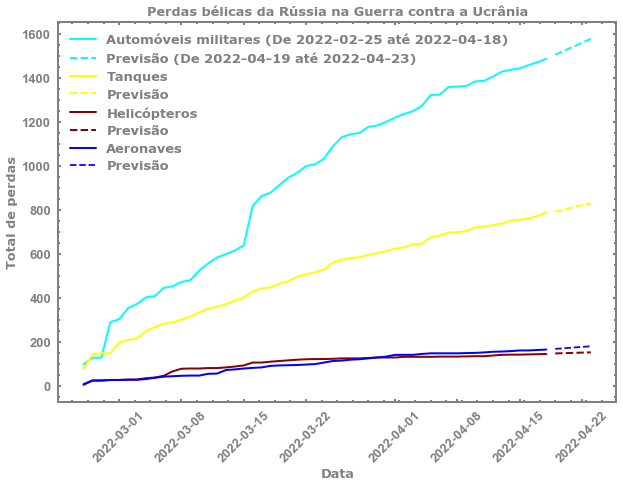

In [399]:
"""
Criando um "local" para alocar a nossa figura
"""
fig, axs = plt.subplots(figsize = (10, 7))
"""
Plot das curvas
"""
axs.plot(Dados["date"], Dados["military auto"], linewidth = 2, label = "Automóveis militares (De 2022-02-25 até 2022-04-18)", color = "cyan")
axs.plot(pred_automoveis["date"], pred_automoveis["military auto"], "--g", linewidth = 2, label = "Previsão (De 2022-04-19 até 2022-04-23)", color = "cyan")
axs.plot(Dados["date"], Dados["tank"], linewidth = 2, label = "Tanques", color = "yellow")
axs.plot(pred_tanques["date"], pred_tanques["tank"], "--g", linewidth = 2, label = "Previsão", color = "yellow")
axs.plot(Dados["date"], Dados["helicopter"], linewidth = 2, label = "Helicópteros", color = "darkred")
axs.plot(pred_helicopter["date"], pred_helicopter["helicopter"], "--g", linewidth = 2, label = "Previsão", color = "darkred")
axs.plot(Dados["date"], Dados["aircraft"], linewidth = 2, label = "Aeronaves", color = "blue")
axs.plot(pred_aeronaves["date"], pred_aeronaves["aircraft"], "--g", label = "Previsão", color = "blue")
"""
Grid = False
"""
axs.grid(False)
"""
Definindo a "grossura" e a cor do eixos
"""
for axis in ["left", "top", "right", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
"""
Trabalha com os ticks do gráfico
"""        
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 13, top = True, right = True, left = True, bottom = True)
axs.tick_params(which='minor', direction = "in", length=2, color='gray', width = 2, top = True, right = True, left = True, bottom = True)
axs.tick_params(which='major', direction = "in", color='gray', length=3.4, width = 2, top = True, right = True, left = True, bottom = True)
"""
Rotacionando o label do eixo x 
"""
plt.xticks(rotation=45)
"""
Definindo um intervalo para o eixo x do gráfico
"""
"""
Legenda da figura
"""
plt.legend(frameon = False, prop = font2, labelcolor = "gray")
"""
Tudo em negrito
"""
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
"""
Labels
"""
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Total de perdas", fontdict = font1)
"""
Fundo branco
"""
fig.patch.set_facecolor("white")
"""
Título da figura
"""
axs.set_title("Perdas bélicas da Rússia na Guerra contra a Ucrânia", fontdict = font1)
plt.show()

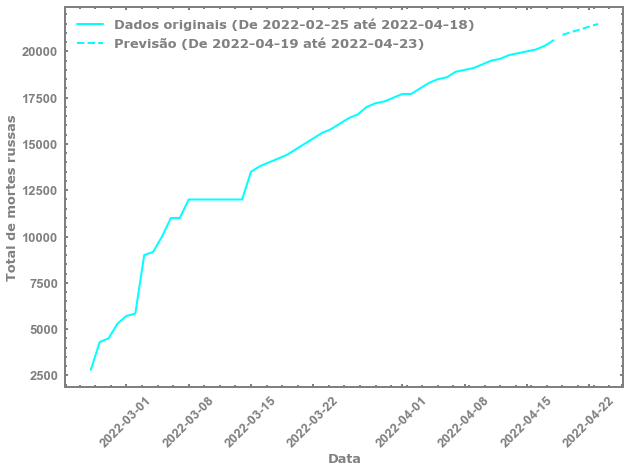

In [400]:
fig, axs = plt.subplots(figsize = (10, 7))
axs.plot(Dados["date"], Dados["personnel"], linewidth = 2, color = "cyan", label = "Dados originais (De 2022-02-25 até 2022-04-18)")
axs.plot(pred_pessoas["date"], pred_pessoas["personnel"], "--g", linewidth = 2, color = "cyan", label = "Previsão (De 2022-04-19 até 2022-04-23)")
axs.grid(False)
for axis in ["left", "top", "right", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 13, top = True, right = True, left = True, bottom = True)
axs.tick_params(which='minor', direction = "in", length=2, color='gray', width = 2, top = True, right = True, left = True, bottom = True)
axs.tick_params(which='major', direction = "in", color='gray', length=3.4, width = 2, top = True, right = True, left = True, bottom = True)
plt.xticks(rotation = 45)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
axs.set_xlabel("Data", fontdict = font1)
axs.set_ylabel("Total de mortes russas", fontdict = font1)
plt.legend(frameon = False, prop = font2, labelcolor = "gray")
fig.patch.set_facecolor("white")
plt.show()          